In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Daily_Transactions.csv')
data

Date                   Mode        Category  \
0     20/09/2018 12:04:08                   Cash  Transportation   
1     20/09/2018 12:03:15                   Cash            Food   
2              19/09/2018  Saving Bank account 1    subscription   
3     17/09/2018 23:41:17  Saving Bank account 1    subscription   
4     16/09/2018 17:15:08                   Cash       Festivals   
...                   ...                    ...             ...   
2456             1/1/2015                   Cash  Transportation   
2457             1/1/2015                   Cash  Transportation   
2458             1/1/2015                   Cash  Transportation   
2459             1/1/2015                   Cash            Food   
2460             1/1/2015                   Cash  Transportation   

                  Subcategory                                  Note  Amount  \
0                       Train                  2 Place 5 to Place 0    30.0   
1                      snacks           Idli medu Vada mix 2 plates    60.0   
2                     Netflix                  1 month subscription   199.0   
3     Mobile Service Provider                     Data booster pack    19.0   
4                Ganesh Pujan                           Ganesh idol   251.0   
...                       ...                                   ...     ...   
2456                      NaN      share jeep - Place T base to top    20.0   
2457                      NaN  share auto - Place H to Place T base    20.0   
2458                      NaN                  bus - brc to Place H    30.0   
2459                      NaN                                   tea    10.0   
2460                      NaN  share auto - hospital to brc station    10.0   

     Income/Expense Currency  
0           Expense      INR  
1           Expense      INR  
2           Expense      INR  
3           Expense      INR  
4           Expense      INR  
...             ...      ...  
2456        Expense      INR  
2457        Expense      INR  
2458        Expense      INR  
2459        Expense      INR  
2460        Expense      INR  

[2461 rows x 8 columns]

In [7]:
print(data.columns)

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')


In [4]:
data.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [5]:
data.describe()

Amount
count    2461.000000
mean     2751.145380
std     12519.615804
min         2.000000
25%        35.000000
50%       100.000000
75%       799.000000
max    250000.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [10]:
data.head

<bound method NDFrame.head of                      Date                   Mode        Category  \
0     20/09/2018 12:04:08                   Cash  Transportation   
1     20/09/2018 12:03:15                   Cash            Food   
2              19/09/2018  Saving Bank account 1    subscription   
3     17/09/2018 23:41:17  Saving Bank account 1    subscription   
4     16/09/2018 17:15:08                   Cash       Festivals   
...                   ...                    ...             ...   
2329  23/02/2015 19:37:47                   Cash  Transportation   
2330  23/02/2015 18:39:59                   Cash         Apparel   
2331  23/02/2015 15:43:13            Credit Card  Transportation   
2333  19/02/2015 20:52:01                   Cash          Health   
2334  19/02/2015 20:51:37                   Cash          Health   

                  Subcategory                         Note  Amount  \
0                       Train         2 Place 5 to Place 0    30.0   
1            

Exploratory data analysis (EDA)

In [11]:
new_data=data.groupby('Category')['Amount'].sum().reset_index()

In [12]:
x=new_data['Category']
y=new_data['Amount']

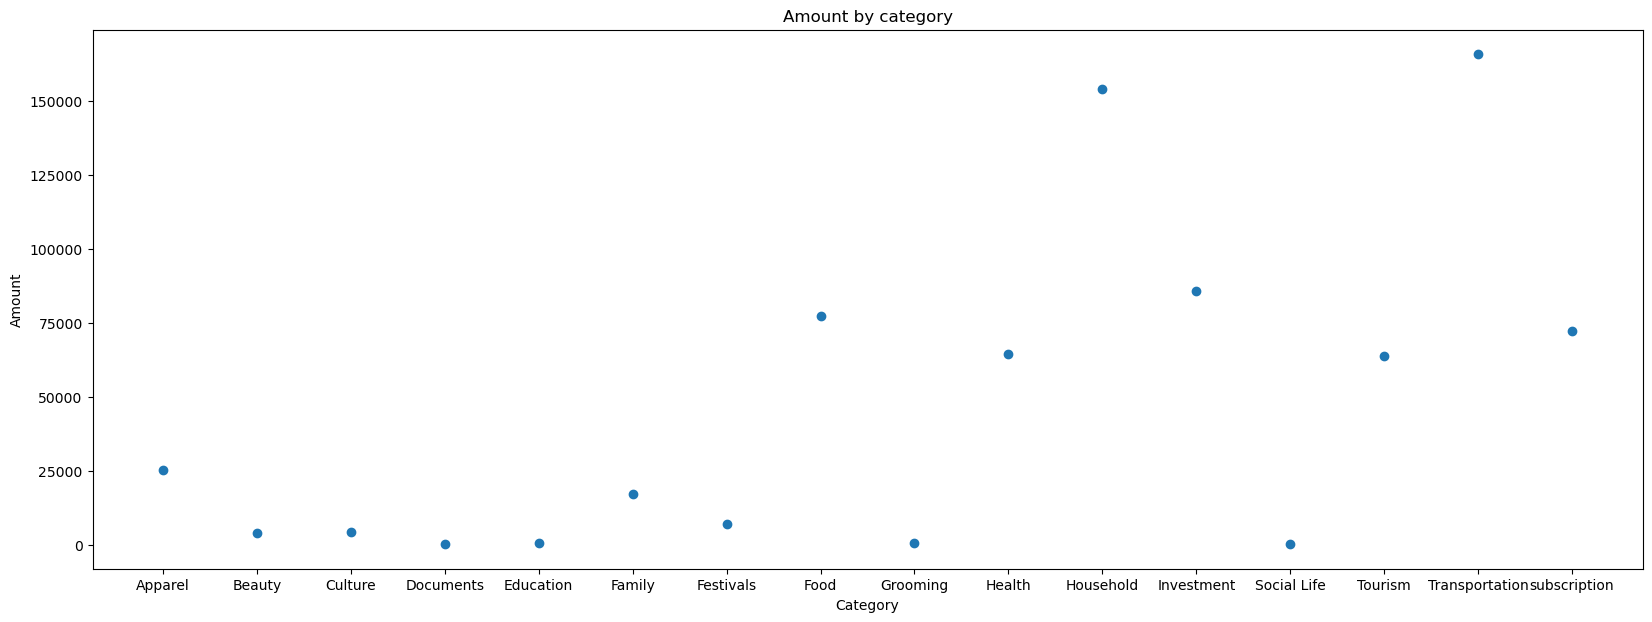

In [13]:
fig = plt.figure(figsize=(20, 7))
plt.scatter(x,y)
plt.title('Amount by category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

In [14]:
pie_of_mode = data['Mode'].value_counts()

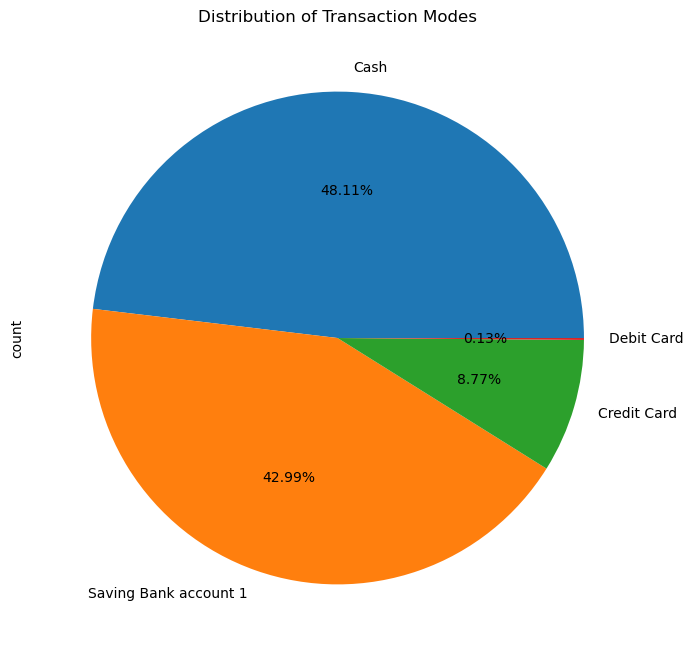

In [15]:
plt.figure(figsize=(8, 8))
pie_of_mode.plot(kind='pie',autopct='%1.2f%%')
plt.title('Distribution of Transaction Modes')
plt.show()

In [16]:
income_expense=data.groupby('Income/Expense')['Amount'].sum()

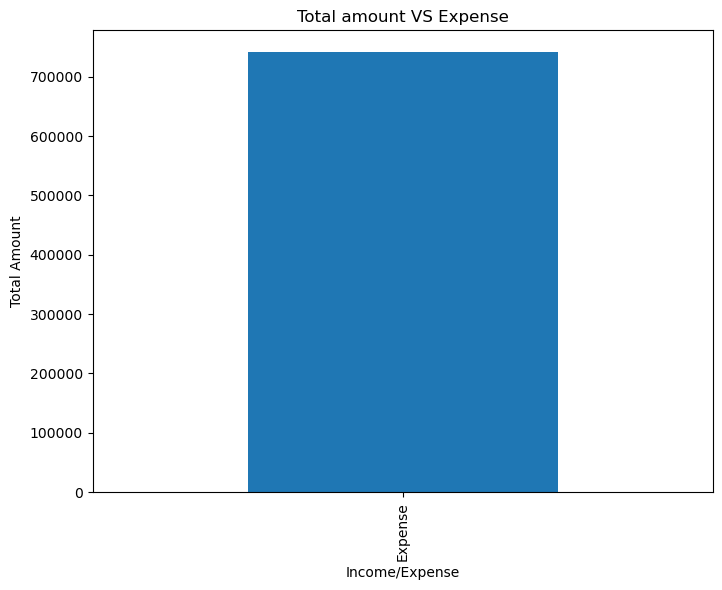

In [17]:
plt.figure(figsize=(8,6))
income_expense.plot(kind='bar')
plt.title('Total amount VS Expense')
plt.xlabel('Income/Expense')
plt.ylabel('Total Amount')
plt.show()

Data Preparing

In [20]:
data.head()

Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [78]:
columns=['Amount','Category','Mode']

x=data[columns]

categorical_columns=['Category','Mode']
numerical_columns=['Amount']

transformed = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),numerical_columns),
        ('cat', OneHotEncoder(sparse_output=False),categorical_columns)
    ])

x_transformed=transformed.fit_transform(x)

Applying elbow method to find the numbers of clustters

In [79]:
wcss_list = []

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_k

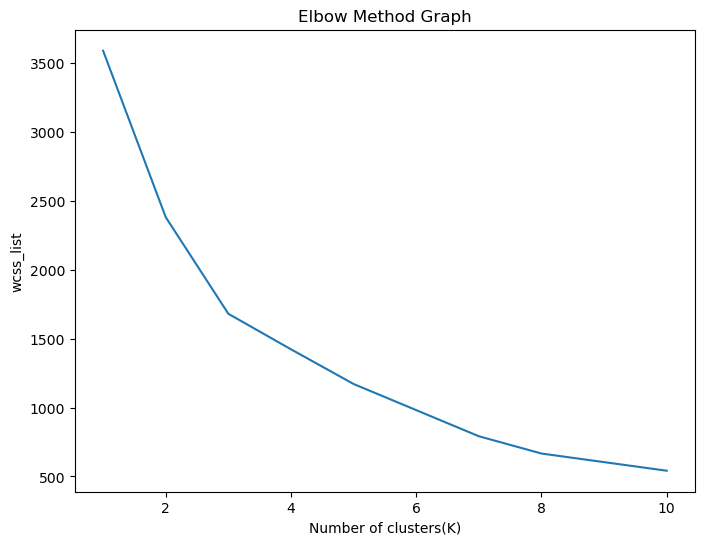

In [80]:
for i in range(1 , 11):
     kmeans = KMeans(n_clusters = i, random_state = 42)
     kmeans.fit(x_transformed)
     wcss_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_list)
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters(K)')
plt.ylabel('wcss_list')
plt.show()

Applying KMeans Algorithm

In [81]:
kmeans = KMeans(n_clusters = 3,random_state = 42)
y_predict = kmeans.fit_predict(x_transformed)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


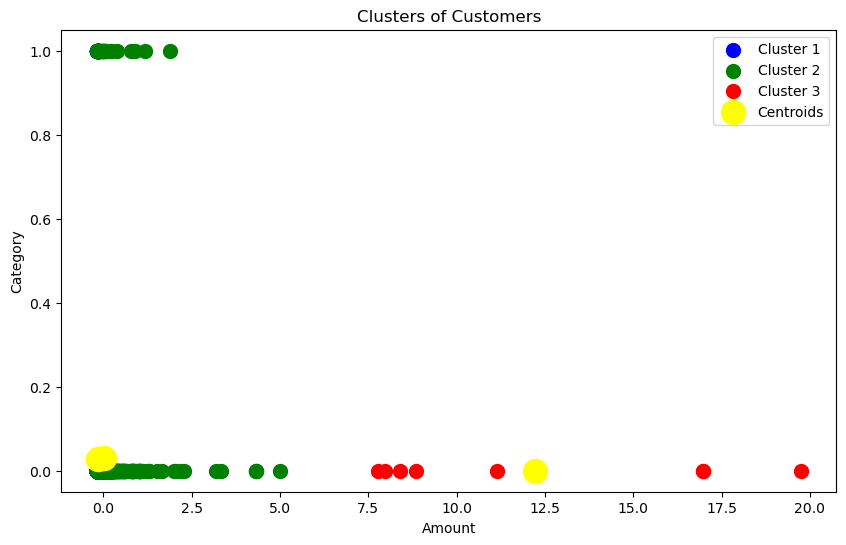

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(x_transformed[y_predict == 0 , 0], x_transformed[y_predict == 0 , 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x_transformed[y_predict == 1 , 0], x_transformed[y_predict == 1 , 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x_transformed[y_predict == 2 , 0], x_transformed[y_predict == 2 , 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Amount')
plt.ylabel('Category')
plt.legend()
plt.show()